# Entregable 1

Con el bojectivo de realizar los analisis preliminares del dataset provisto, se llevaron a cabo las siguientes acciones:

- Procesamiento del dataset segun detalle:

In [68]:

# El siguiente script accede al dataset provisto, el cual debe estar en su forma original en la carpeta ./dataset
# para cada zip file (correspondiente a cada mes), se parsean las siguientes variables: fecha, tarjeta, corredor, linea, sentido
# guardando para este caso en particular un nuevo csv con totalizadores por dia de la semana y mes del año segun siguiente estructura

# |'month'|'acc-month'|'acc-sun'|'acc-monday'|'acc-tue'|'acc-wed'|'acc-thu'|'acc-fri'|'acc-sat'
# donde acc refiere a totalizador y donde las columnas representan los dias de la semana y las filas los meses del años

import zipfile
import csv
from io import TextIOWrapper
from datetime import datetime
import numpy as np

# two dimensional output list (keys: week day, month - value: total ticket count)
numtickets = []

# iterate by month 1-12
numtickets.append(['month','acc-month','acc-sun','acc-mon','acc-tue','acc-wed','acc-thu','acc-fri','acc-sat'])
for i in range(1, 13):

    # get list of csv file in zip for this month
    print('processing month', i)
    try:
        zip_file = zipfile.ZipFile('dataset/boletos_2019-{:02d}.zip'.format(i), 'r')
        csv_list = zip_file.infolist()
    except:
        continue

    # add row for this month in output list
    numtickets.append([i,0,0,0,0,0,0,0,0])

    # iterate for each day in month
    for csv_file in csv_list:

        print('processing', csv_file.filename)
        file = zip_file.open(csv_file.filename, 'r')
        csv_reader = csv.reader(TextIOWrapper(file, 'latin-1'), delimiter=';')

        # iterate for each ticket entry
        for r, row in enumerate(csv_reader):
            if r == 0:
                continue

            # get all variables from row
            fecha = datetime.strptime(row[0], '%d/%m/%Y %I:%M:%S %p')
            tarjeta = int(row[2])
            corredor = row[3]
            linea = row[4]
            sentido = row[5]
            
            # accumulate ticket for this entry
            numtickets[-1][int(fecha.strftime('%w'))+2] += 1
        
        # accumulate per month
        numtickets[-1][1] = np.sum(numtickets[-1][2:])

# save output list as csv
with open('numtickets-day-month.csv', 'w') as file:
    write = csv.writer(file)
    write.writerows(numtickets)

processing month 1
processing boletos_2019-01-01.csv
processing boletos_2019-01-02.csv
processing boletos_2019-01-03.csv
processing boletos_2019-01-04.csv
processing boletos_2019-01-05.csv
processing boletos_2019-01-06.csv
processing boletos_2019-01-07.csv
processing boletos_2019-01-08.csv
processing boletos_2019-01-09.csv
processing boletos_2019-01-10.csv
processing boletos_2019-01-11.csv
processing boletos_2019-01-12.csv
processing boletos_2019-01-13.csv
processing boletos_2019-01-14.csv
processing boletos_2019-01-15.csv
processing boletos_2019-01-16.csv
processing boletos_2019-01-17.csv
processing boletos_2019-01-18.csv
processing boletos_2019-01-19.csv
processing boletos_2019-01-20.csv
processing boletos_2019-01-21.csv
processing boletos_2019-01-22.csv
processing boletos_2019-01-23.csv
processing boletos_2019-01-24.csv
processing boletos_2019-01-25.csv
processing boletos_2019-01-26.csv
processing boletos_2019-01-27.csv
processing boletos_2019-01-28.csv
processing boletos_2019-01-29

- Grafica de datos obtenidos segun detalle:

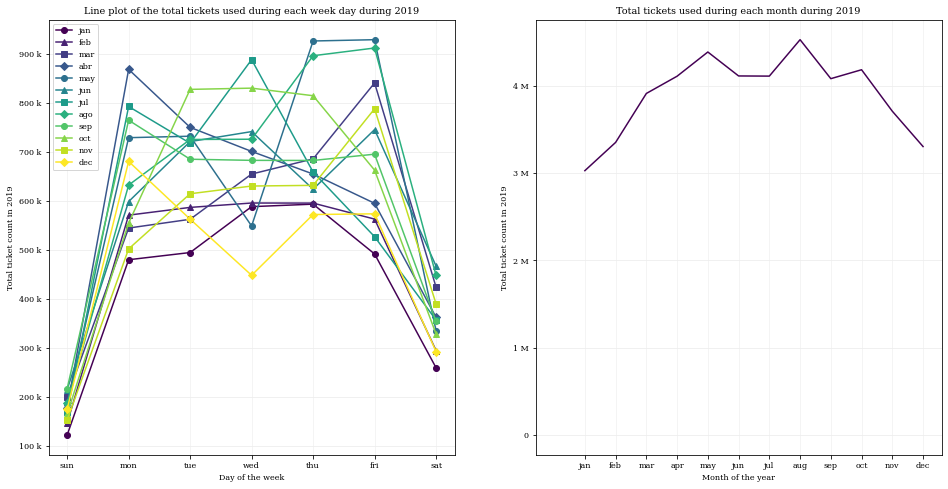

In [76]:

# En base a los datos obtenidos en ./processed-data/numtickets-day-month.csv
# realizamos dos graficos, uno discriminado por dia de la semana y otro por mes del año

import csv

# read outlist from csv
with open("processed-data/numtickets-day-month.csv", 'r') as file:
    csv_reader = csv.reader(file, delimiter=',')
    numtickets = list(csv_reader)

# map to int
acc_month = [int(sub[1]) for sub in numtickets[1:]]
numtickets = [[int(num) for num in sub[2:]] for sub in numtickets[1:]]
    
# plot config: two plots side by side
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
font = {'family': 'serif',
        'weight': 'normal',
        'size': 8}
plt.rc('font', **font)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# colormap
from matplotlib import cm
color_map = cm.get_cmap('viridis', 12)

# plot 1) line plot
axs[0].grid(axis='x', which='both', color='0.95')
axs[0].grid(axis='y', which='major', color='0.93')
axs[0].grid(axis='y', which='minor', color='0.96')

# use k for thousends in y axis
axs[0].yaxis.set_major_formatter(ticker.EngFormatter())

axs[0].set_title("Line plot of the total tickets used during each week day during 2019")
axs[0].set_xlabel("Day of the week")
axs[0].set_ylabel("Total ticket count in 2019")
axs[0].xaxis.set_ticks([0,1,2,3,4,5,6,7])
axs[0].set_xticklabels(['','sun','mon','tue','wed','thu','fri','sat'])

# plot data from 12 months
axs[0].plot(range(1,8), numtickets[0], marker='o', color=color_map(0), label='jan')
axs[0].plot(range(1,8), numtickets[1], marker='^', color=color_map(1), label='feb')
axs[0].plot(range(1,8), numtickets[2], marker='s', color=color_map(2), label='mar')
axs[0].plot(range(1,8), numtickets[3], marker='D', color=color_map(3), label='abr')
axs[0].plot(range(1,8), numtickets[4], marker='o', color=color_map(4), label='may')
axs[0].plot(range(1,8), numtickets[5], marker='^', color=color_map(5), label='jun')
axs[0].plot(range(1,8), numtickets[6], marker='s', color=color_map(6), label='jul')
axs[0].plot(range(1,8), numtickets[7], marker='D', color=color_map(7), label='ago')
axs[0].plot(range(1,8), numtickets[8], marker='o', color=color_map(8), label='sep')
axs[0].plot(range(1,8), numtickets[9], marker='^', color=color_map(9), label='oct')
axs[0].plot(range(1,8), numtickets[10], marker='s', color=color_map(10), label='nov')
axs[0].plot(range(1,8), numtickets[11], marker='D', color=color_map(11), label='dec')

axs[0].legend()

# plot 2) stacked bar plot
axs[1].grid(axis='x', which='both', color='0.95')
axs[1].grid(axis='y', which='major', color='0.93')
axs[1].grid(axis='y', which='minor', color='0.96')

# use M for millions in y axis
axs[1].yaxis.set_major_formatter(ticker.EngFormatter())

axs[1].set_title("Total tickets used during each month during 2019")
axs[1].set_xlabel("Month of the year")
axs[1].set_ylabel("Total ticket count in 2019")
axs[1].xaxis.set_ticks([1,2,3,4,5,6,7,8,9,10,11,12])
axs[1].set_xticklabels(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])

# plot data from 12 months
width = 0.35 
axs[1].plot(range(1,13), acc_month, width, color=color_map(0))

# # save figure
# plt.savefig("processed-data/numtickets-day-month.png", format='png')
# plt.savefig("processed-data/numtickets-day-month.pdf", format='pdf')






## Conclusiones

Podemos observar a primera vista, que la frecuencia de corte de boletos es significativamente menor para fines de semana y para meses de verano en corelacion con las vacaciones de escuelas y muchas actividades, lo cual nos otorga cierto grado de confianza en los resultados obtenidos ya que se acomoda a lo esperado para futuros analisis.